## Pivot Tables

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# 
# Load data
titanic = pd.read_excel('../data/titanic.xlsx')
titanic.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,body,boat
913,3,1,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S,NaN,NaN,13
1012,3,0,"McNeill, Miss. Bridget",female,NaN,0,0,370368,7.7500,NaN,Q,NaN,NaN,NaN
933,3,0,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S,NaN,NaN,NaN
1057,3,1,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,NaN,NaN,C
167,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,"New York, NY / Stamford CT",NaN,D


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
 12  body       121 non-null    float64
 13  boat       486 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
titanic.pivot_table(values = 'fare', index = 'sex', aggfunc = 'mean')

,fare
sex,
female,46.198097
male,26.154601


In [6]:
# 
# 
titanic_copy = titanic.copy()
# 
# Rename column
titanic_copy.rename(
    columns = {
        'sex': 'gender'
    },
    inplace = True
)
# 
# Make all columns uppercase
titanic_copy.columns = titanic.columns.str.capitalize()
titanic_copy.columns

Index(['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Home.dest', 'Body', 'Boat'],
      dtype='object')

In [7]:
# 
# get aggregate stats
titanic.groupby('sex')['fare'].agg(['mean', 'max', 'min'])

,mean,max,min
sex,,,
female,46.198097,512.3292,6.75
male,26.154601,512.3292,0.00


In [8]:
# 
# Filtering data using loc
titanic_copy.loc[0:11, ['Cabin', 'Fare']]

,Cabin,Fare
0,B5,211.3375
1,C22 C26,151.5500
2,C22 C26,151.5500
3,C22 C26,151.5500
4,C22 C26,151.5500
5,E12,26.5500
6,D7,77.9583
7,A36,0.0000
8,C101,51.4792
9,NaN,49.5042


In [9]:
# 
# Filtering data using iloc (selects specific/sliced data) 
titanic_copy.iloc[2]          # returns a series

Pclass                                     1
Survived                                   0
Name            Allison, Miss. Helen Loraine
Sex                                   female
Age                                      2.0
Sibsp                                      1
Parch                                      2
Ticket                                113781
Fare                                  151.55
Cabin                                C22 C26
Embarked                                   S
Home.dest    Montreal, PQ / Chesterville, ON
Body                                     NaN
Boat                                     NaN
Name: 2, dtype: object

In [10]:
titanic_copy.iloc[[2]]           # Double braces return a DataFrame

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.dest,Body,Boat
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN


In [11]:
# 
# Getting more than one row data
titanic_copy.iloc[2:4]

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.dest,Body,Boat
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON",135.0,NaN


In [12]:
titanic_copy.iloc[:3]

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.dest,Body,Boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO",NaN,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",NaN,NaN


## Subsets

In [13]:
# 
# Select row 0 and row 5 with data from only 4 columns
titanic.iloc[[0,5], [2, 3, 4, 1]]

,name,sex,age,survived
0,"Allen, Miss. Elisabeth Walton",female,29.0,1
5,"Anderson, Mr. Harry",male,48.0,1


In [14]:
# 
# Select a subset of consecutive rows and columns (i.e., select the first 3 rows and the first 6 columns
titanic.iloc[0:3, 0:6]

,pclass,survived,name,sex,age,sibsp
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1


## Sorting Values by any Column

In [15]:
j1 = pd.read_csv('../data/joining_data1.csv')
j1

,name,animal,age
0,Catalie Portman,cat,3
1,Pico de Gato,cat,5
2,Chewbarka,dog,1
3,Sir Isaac Mewton,cat,7
4,K9,cat,11
5,Arf Vader,dog,6


In [16]:
# 
# Sort by age from maximum to minimum
j1.sort_values(by = 'age', ascending = False )

,name,animal,age
4,K9,cat,11
3,Sir Isaac Mewton,cat,7
5,Arf Vader,dog,6
1,Pico de Gato,cat,5
0,Catalie Portman,cat,3
2,Chewbarka,dog,1


In [17]:
j2 = pd.read_csv('../data/joining_data2.csv')
j2

,name,vaccinated
0,Catalie Portman,True
1,Pico de Gato,True
2,Chewbarka,False
3,Sir Isaac Mewton,True
4,K9,False
5,Spiderpig,True


In [18]:
# 
# Sort data by boolean values
j2.sort_values(by = 'vaccinated')

,name,vaccinated
2,Chewbarka,False
4,K9,False
0,Catalie Portman,True
1,Pico de Gato,True
3,Sir Isaac Mewton,True
5,Spiderpig,True


### countplot()

Text(0.5, 1.0, 'Survival Count')

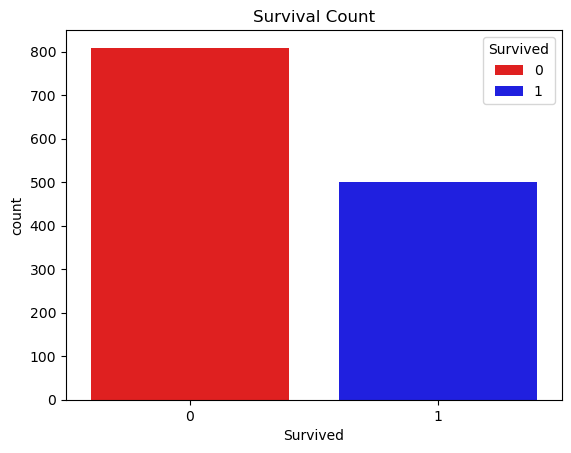

In [19]:
# 
# Countplot - counts the total number of unique values
sns.countplot(data = titanic_copy, x = 'Survived', hue = 'Survived', palette = ['red', 'blue'])
plt.title('Survival Count')

Text(0.5, 1.0, 'Sex Count')

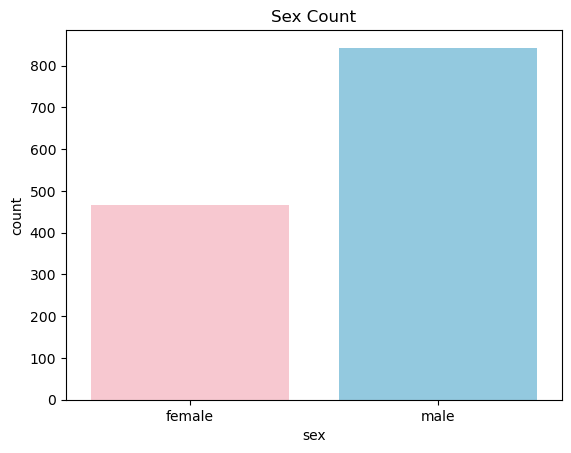

In [20]:
sns.countplot(
    data = titanic,
    x = 'sex',
    hue = 'sex',
    palette = ['pink', 'skyblue']
)
plt.title('Sex Count')

### Histogram

Text(0.5, 1.0, 'Age Distribution')

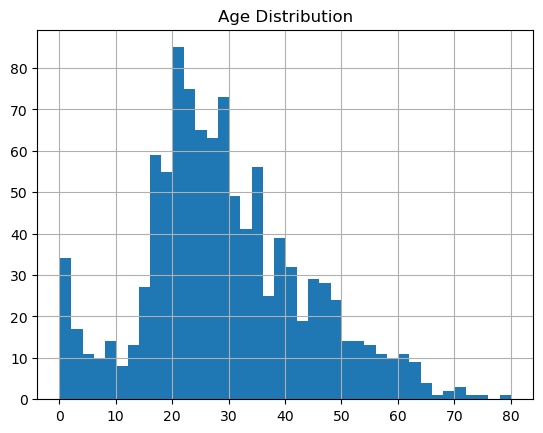

In [21]:
titanic_copy['Age'].hist(bins = 40)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Fare Distribution')

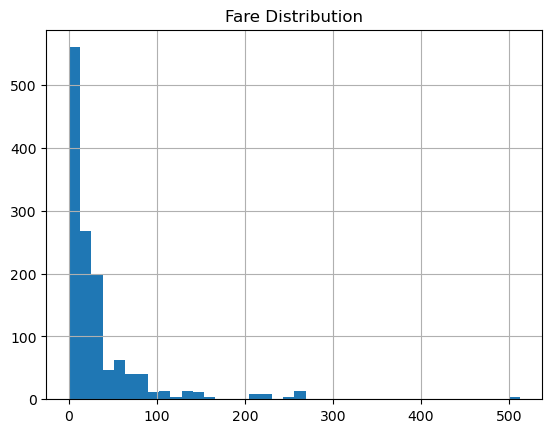

In [22]:
titanic_copy['Fare'].hist(bins = 40)
plt.title('Fare Distribution')

### Boxplot

<Axes: xlabel='Pclass', ylabel='Age'>

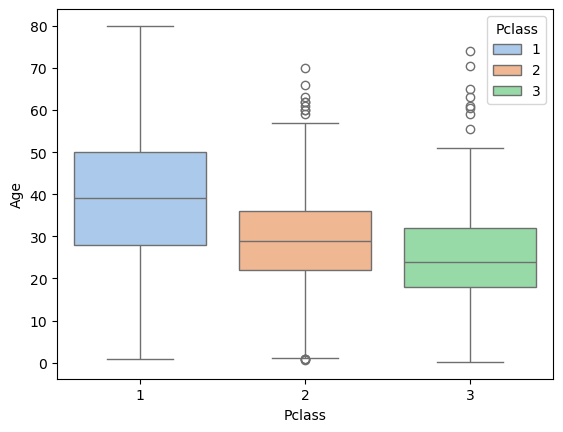

In [25]:
sns.boxplot(
    data = titanic_copy,
    x = 'Pclass',
    y = 'Age',
    hue = 'Pclass',
    palette = 'pastel'
)

<Axes: xlabel='Survived', ylabel='Age'>

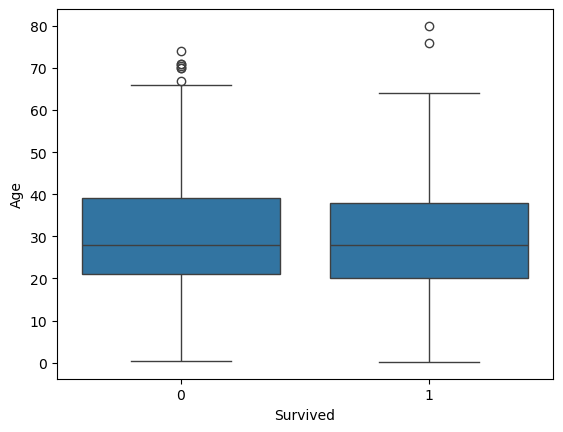

In [26]:
# 
# Survival Rate in relation to age
sns.boxplot(
    data = titanic_copy,
    x = 'Survived',
    y = 'Age',
)


### Heat Map
Heat Maps are used to visualize missing values


Text(0.5, 1.0, 'Missing Values Heatmap')

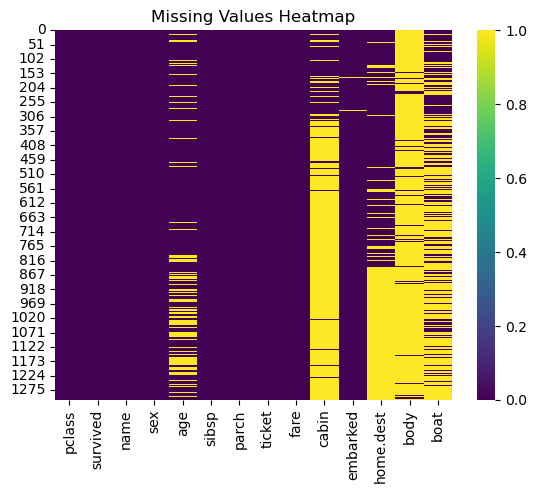

In [30]:
# 
# Yellow shows the null values
sns.heatmap(
    data = titanic.isnull(),         # 
    cbar = True,                     # Shows the color bar
    cmap = 'viridis'                 # Visualizes the missing values
)
plt.title('Missing Values Heatmap')